## Halo Toy Problem

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# delta z
dz = 0.0001

# Length of z direction
L = 1

# x range

zarray = np.arange( 0, L, dz )

# Physical Params
omegav = 1

mu = 50 * omegav # in unit of omegav where omegav = 1
refl = 0.1 # reflected neutrinos
thetav = np.arcsin( np.sqrt( 0.3 ) )



In [4]:
# Initial set up
rhoF0 = np.array( [ [ 1, 0 ], [ 0, -1 ] ] )/2
rhobB0 = np.array( [ [ 0, 0 ], [ 0, 0 ] ] )/2

# Vacuum Hamiltonian in unit of omega
hvac = np.array( [ [ -np.cos(thetav), np.sin(thetav) ], [ np.sin(thetav), np.cos(thetav) ] ] )



def hamilF( rhoF, rhobB, muValue ):
    """
    Calculate the hamiltonian for forward beams
    """
    
    hnunuF = 2 * muValue * ( rhoF - rhobB )
    
    return hvac + hnunuF
    

def hamilbB( rhobB, rhoF, muValue ):
    
    return -hvac + 2 * muValue * ( rhoF - rhobB )


In [5]:
def vacSolver(N, dx, initx, initrho, hamil = None):
    
    dx = np.abs(dx)
    
    if hamil == None:
        hamil = hvac
    
    rhoa = np.zeros( N )
    rhobr = np.zeros( N )
    rhobi = np.zeros( N )

    rhoa[0], rhobr[0], rhobi[0] = initrho[0,0].real, initrho[0,1].real, initrho[0,1].imag


    for i in np.arange(0,N-1):

        fdarhs = - hamil[0,1].real * rhobi + hamil[0,1].imag * rhobr
        fdbrrhs = - hamil[0,1].imag * rhoa + hamil[0,0].real * rhobi
        fdbirhs = - hamil[0,0].real * rhobr + hamil[0,1].real * rhoa


        rhoa[i+1] = rhoa[i] +  dx * fdarhs[i]
        rhobr[i+1] = rhobr[i] +  dx * fdbrrhs[i]
        rhobi[i+1] = rhobi[i] +  dx * fdbirhs[i]
        
    rhoarray = np.array([ [ [ rhoa[i], rhobr[i] + 1j *  rhobi[i] ], [ rhobr[i] - 1j *  rhobi[i], -rhoa[i] ]  ] for i in np.arange(0,N-1)]) 

    return rhoarray

In [10]:
# Solve Vacuum Problem


def initL():

    Nz = int(L/dz)

    rhoFinitL = vacSolver(Nz, dz, 0, rhoF0 )

    # determine the flavor at z = L

    rhoL = rhoFinitL[-1]
#     print(len(rhoFinitL))
    
    probFinitL = [2*rhoFinitL[i,0,0].real for i in np.arange( len(rhoFinitL) )]
    
    return {'rhoL': rhoL, 'prob': probFinitL, 'rho': rhoFinitL  }

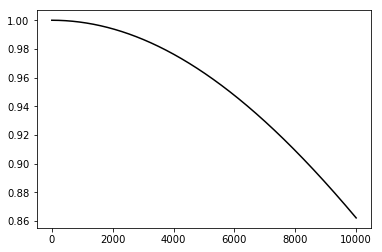

In [11]:
plt.plot(initL()['prob'], '-k')
plt.show()

In [12]:
initL()['rhoL']

array([[ 0.43107464+0.j        , -0.10528522+0.23042824j],
       [-0.10528522-0.23042824j, -0.43107464+0.j        ]])

Test the backward vacuum propagation

In [13]:
vacSolverBackTest = vacSolver( int(L/dz), -dz, L, initL()['rhoL'] )

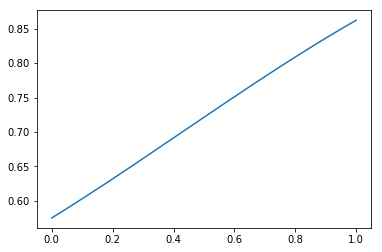

In [14]:
plt.plot( np.arange(L,0,-dz)[:-1] , [2*vacSolverBackTest[i,0,0].real for i in np.arange( len(vacSolverBackTest) )])
plt.show()

The protocal is

1. recalculate forward beam using backward beam
2. recalculate backward beam using the new forward beam
3. ...

In [15]:
# for i in np.arange(Ntop):
    
def BeamSolver(N, dx, initx, initrho, hamil):
    
    dx = np.abs(dx)
    
    rhoa = np.zeros( N )
    rhobr = np.zeros( N )
    rhobi = np.zeros( N )

    rhoa[0], rhobr[0], rhobi[0] = initrho[0,0].real, initrho[0,1].real, initrho[0,1].imag

    for i in np.arange(0,N-1):

        fdarhs = - hamil[i,0,1].real * rhobi + hamil[i,0,1].imag * rhobr
        fdbrrhs = - hamil[i,0,1].imag * rhoa + hamil[i,0,0].real * rhobi
        fdbirhs = - hamil[i,0,0].real * rhobr + hamil[i,0,1].real * rhoa


        rhoa[i+1] = rhoa[i] +  dx * fdarhs[i]
        rhobr[i+1] = rhobr[i] +  dx * fdbrrhs[i]
        rhobi[i+1] = rhobi[i] +  dx * fdbirhs[i]
        
    rhoarray = np.array([ [ [ rhoa[i], rhobr[i] + 1j *  rhobi[i] ], [ rhobr[i] - 1j *  rhobi[i], -rhoa[i] ]  ] for i in np.arange(0,N-1)]) 

    return rhoarray

In [16]:
# Calculate hamiltonian

def BeamHamil(rhoF, rhoB, mu):
    
    return 2 * mu * ( rhoF - rhoB )
    

In [17]:
test1 = initL()['rho']

In [18]:
test2 = BeamSolver( int(L/dz), dz, 0, rhoF0, test1)

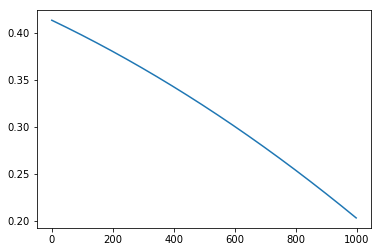

In [19]:
test3 = BeamHamil(test1, test2[::-1], mu)

plt.plot( [test3[i, 0, 0].real for i in np.arange(999) ] )
plt.show()

In [20]:
test4 = BeamSolver( int(L/dz), dz, 0, rhoF0, test3[::-1])

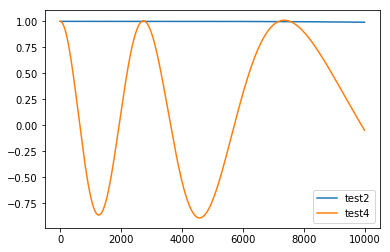

In [21]:
plt.plot([2*test2[i,0,0].real for i in np.arange( len(test2) )], label = 'test2')
plt.plot([2*test4[i,0,0].real for i in np.arange( len(test4) )], label = 'test4')
plt.legend()
plt.show()

# of iterations 0


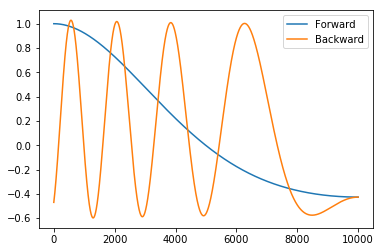

# of iterations 2


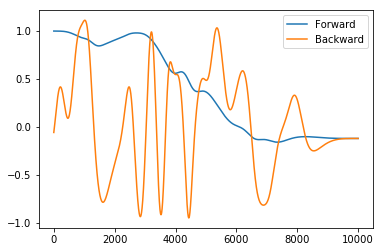

# of iterations 4


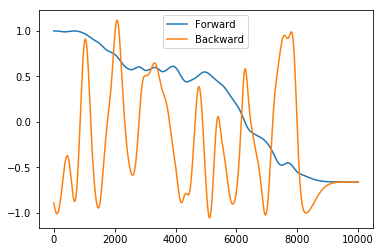

# of iterations 6


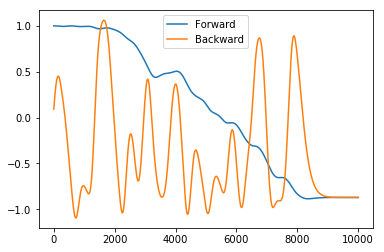

# of iterations 8


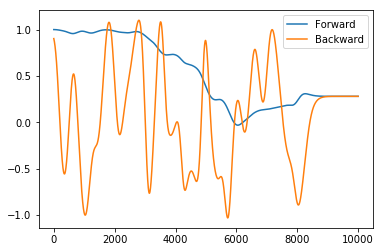

# of iterations 10


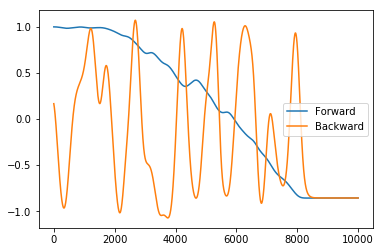

# of iterations 12


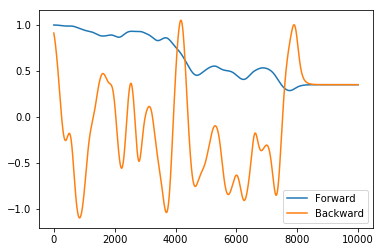

# of iterations 14


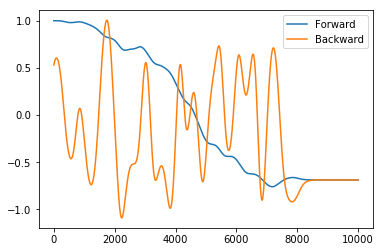

# of iterations 16


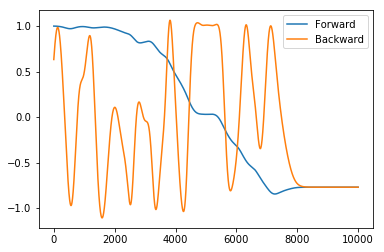

# of iterations 17


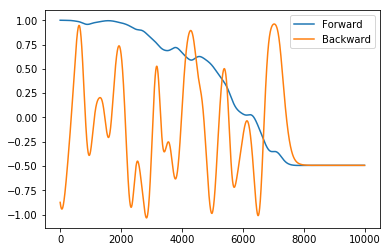

# of iterations 18


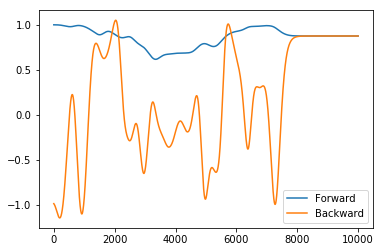

# of iterations 19


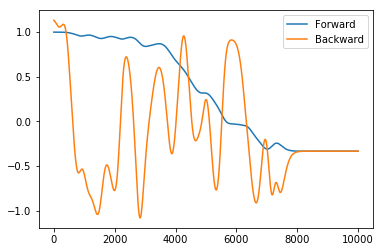

In [22]:
# Number of iterations
Ntop = 20

N = int( L/dz )

# rhoFIter = np.zeros( (2, N) )
# rhoBIter = np.zeros( (2, N) )

rhoFIter = initL()['rho']
rhoBIter = vacSolver( N, -dz, L, initL()['rhoL'] )


for i in np.arange(Ntop):
    
    hamilBIter = BeamHamil(rhoFIter[::-1], rhoBIter, mu )
    hamilFIter = BeamHamil(rhoFIter, rhoBIter[::-1], mu*refl )
    
    
    rhoFIter = BeamSolver( int(L/dz), dz, 0, rhoF0, hamilFIter)
    
    rhoB0 = rhoFIter[-1]
    
    rhoBIter = BeamSolver( int(L/dz), -dz, L, rhoB0, hamilBIter)
    
    probFIter = [2*rhoFIter[i,0,0].real for i in np.arange(N-1)]
    probBIter = [2*rhoBIter[i,0,0].real for i in np.arange(N-1)]
    
    if (i % ( int(Ntop/10) ) == 0) | (np.abs(Ntop - i)<5 ):
        print('# of iterations', i)
        plt.plot( probFIter, label='Forward' )
        plt.plot( probBIter[::-1], label='Backward' )
        plt.legend()
        plt.show()
    
    